<a href="https://colab.research.google.com/github/harrietgilmour/SIAM_FaIR/blob/main/Damage_function_sensitivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In the original BAU SIAM scenario, the large increases in emissions cause the GWP growth rate to rapidly reduce due to climate damages. Damages are shown through the Capital Decay Rate function (d = max(3,3+Sd(deltaT-1)). Currently, Sd (the decay sensitivity to climate change is very pessimistic at 0.75%/yr/^c above 1^c warming. I would like to reduce this to see how much this impacts the GWP overall. 

# BAU with original decay sensitivity (Ds) to temp change (0.75%/yr/^c)

In [ ]:
  #import modules that are needed.

%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
import pandas as pd

In [ ]:
#creating lists of all PARAMETERS
#================================

years = list(range(1982,2201)) #list of years from 1982-2100 (1980-81 need to be calculated separately from the loop)
K_1980 = 450 #1980 total capital value (T$)
A = 0.06 #Total factor productivity (%/yr) (6%/yr)
sensitivity_GWP = 0.7 #emissions sensitivity to GWP (unitless) - 0.7 * capital^0.6
emissions_GWP_ratio = 0.6 #ratio of emissions to GWP growth
land_change_emissions = 1.5 #land use change emissions (GtC/yr)
delta_u_1980 = 250 #1980 cumulative emissions (GtC)
clim_sens = (1.1/600) #climate sensitivity (^c/GtC)
base_decay = 0.03 #base decay rate of capital (%/yr) (3%/yr)
Sd = 0.0075 #decay sensitivity to global mean surface temperature change (%/yr/^c) (0.75%/yr/^c)
#emissions_scale = 3.793 #total global CO2 emissions in 1980 / emissions_1980

In [ ]:
#calculating 1980 values (initial values for all variables in 1980)
#==================================================================

#already have initial capital (K_1980) and cumulative emissions (delta_u_1980) in parameters

y_1980 = A*K_1980 #GWP in 1980 (T$/yr)
u_1980 = (0.7*y_1980**0.6) #emissions rate in 1980 (GtC/yr)
delta_t_1980 = clim_sens*delta_u_1980 #global mean surface temp change in 1980 (^C)
d_1980 = max(0.03,0.03+Sd*(delta_t_1980-1)) #capital decay rate in 1980 (%/yr)

In [ ]:
#calculating 1981 values (these need to be calculated as there are still specific equations for this year that can't go in the loop)
#===================================================================================================================================

K = (K_1980)+(y_1980)-base_decay*K_1980 #capital in 1981 (T$)
y = A*K #GWP in 1981 (T$/yr)
u = (0.7*y**0.6) #emissions rate in 1981 (GtC/yr)
delta_u = delta_u_1980+u+land_change_emissions #cumulative emissions in 1981 (GtC)
delta_t = clim_sens*delta_u #global mean surface temp change in 1981 (^C)
d = max(0.03,0.03+Sd*(delta_t-1)) #capital decay rate in 1981 (%/yr)
y_growth_rate = (y-y_1980)/y_1980 #GWP growth rate in 1981 (%/yr)

In [ ]:
#creating the list that the 1980, 1981 and eventually 1982-2100 will be appended to:
#===================================================================================

#cumulative emissions series:
delta_u_full_series=[] #empty list for cumulative emissions
delta_u_full_series.append(delta_u_1980) #adding the 1980 value
delta_u_full_series.append(delta_u) #adding the 1981 value
print(delta_u_full_series)

#temperature change series:
delta_t_full_series=[]
delta_t_full_series.append(delta_t_1980)
delta_t_full_series.append(delta_t)
print(delta_t_full_series)

#total capital series:
K_full_series=[]
K_full_series.append(K_1980)
K_full_series.append(K)
print(K_full_series)

#emissions series:
u_full_series=[]
u_full_series.append(u_1980)
u_full_series.append(u)
print(u_full_series)

#capital decay rate series:
d_full_series=[]
d_full_series.append(d_1980)
d_full_series.append(d)
print(d_full_series)

#GWP series:
y_full_series=[]
y_full_series.append(y_1980)
y_full_series.append(y)
print(y_full_series)

#GWP growth rate series:
y_growth_rate_series=[]
y_growth_rate_series.append(0)
y_growth_rate_series.append(y_growth_rate)
print(y_growth_rate_series)

[250, 256.6477640585382]
[0.45833333333333337, 0.4705209007739867]
[450, 463.5]
[5.057271839089452, 5.147764058538205]
[0.03, 0.03]
[27.0, 27.81]
[0, 0.029999999999999954]


In [ ]:
#creating an array of years between 1982-2100
#============================================
years_array=(np.array(years))


#go through loop for all variables to get from 1982 to 2100
#==========================================================
for x in range(0,years_array.size): #loop for the number of years between 1982-2100 (119)
  K = K+y-d*K
  y = A*K
  u = (0.7*y**0.6)
  delta_u = delta_u+u+land_change_emissions
  delta_t = clim_sens*delta_u
  d = max(0.03,0.03+Sd*(delta_t-1))
  #y_growth_rate = (y-[y-1])/[y-1]
  delta_u_full_series.append(delta_u) #adding the 1982-2100 cumulative emissions values to the list in previous cell
  delta_t_full_series.append(delta_t) #adding the temp change from 1982-2100
  K_full_series.append(K) #adding 1982-2100 total capital to the list
  u_full_series.append(u) #adding 1982-2100 emissions to the list
  d_full_series.append(d) #adding 1982-2100 capital decay rate to the list
  y_full_series.append(y) #adding 1982-2100 GWP to the list

In [ ]:
#creating an array that includes all years from 1980-2100
#========================================================
years_full = list(range(1980,2201)) #creating a new years array so that 1980 and 1981 are included and x and y shapes match
years_array_full=(np.array(years_full))

In [ ]:
df1=pd.DataFrame()

df1['Years']=years_full
df1['capital']=K_full_series
df1['GWP']=y_full_series
df1['emissions']=u_full_series
df1['cumulative_emissions']=delta_u_full_series
df1['temp_change']=delta_t_full_series
df1['decay_rate']=d_full_series
df1['GWP_growth_rate']=df1['GWP'].pct_change()

In [ ]:
df1

,Years,capital,GWP,emissions,cumulative_emissions,temp_change,decay_rate,GWP_growth_rate
0,1980,450.000000,27.000000,5.057272,250.000000,0.458333,0.030000,NaN
1,1981,463.500000,27.810000,5.147764,256.647764,0.470521,0.030000,0.030000
2,1982,477.405000,28.644300,5.239875,263.387640,0.482877,0.030000,0.030000
3,1983,491.727150,29.503629,5.333635,270.221275,0.495406,0.030000,0.030000
4,1984,506.478964,30.388738,5.429072,277.150347,0.508109,0.030000,0.030000
...,...,...,...,...,...,...,...,...
216,2196,2511.142437,150.668546,14.187687,4573.703957,8.385124,0.085388,-0.025173
217,2197,2447.388474,146.843308,13.970455,4589.174412,8.413486,0.085601,-0.025388
218,2198,2384.732519,143.083951,13.754747,4604.429158,8.441453,0.085811,-0.025601
219,2199,2323.180425,139.390825,13.540620,4619.469779,8.469028,0.086018,-0.025811


# BAU with lower decay sensitivity (Ds).
This time it will be 20% lower, so 0.006 (6%/yr/^C)




In [ ]:
#creating lists of all PARAMETERS
#================================
#all other parameters will be the same

Sd20 = 0.006 #NEW decay sensitivity to global mean surface temperature change (%/yr/^c) (0.75%/yr/^c)


In [ ]:
#calculating 1980 values (initial values for all variables in 1980)
#==================================================================

#already have initial capital (K_1980) and cumulative emissions (delta_u_1980) in parameters

y_1980 = A*K_1980 #GWP in 1980 (T$/yr)
u_1980 = (0.7*y_1980**0.6) #emissions rate in 1980 (GtC/yr)
delta_t_1980 = clim_sens*delta_u_1980 #global mean surface temp change in 1980 (^C)
d_1980_Sd20 = max(0.03,0.03+Sd20*(delta_t_1980-1)) #capital decay rate in 1980 (%/yr)

In [ ]:
#calculating 1981 values (these need to be calculated as there are still specific equations for this year that can't go in the loop)
#===================================================================================================================================

K_Sd20 = (K_1980)+(y_1980)-base_decay*K_1980 #capital in 1981 (T$)
y_Sd20 = A*K_Sd20 #GWP in 1981 (T$/yr)
u_Sd20 = (0.7*y_Sd20**0.6) #emissions rate in 1981 (GtC/yr)
delta_u_Sd20 = delta_u_1980+u_Sd20+land_change_emissions #cumulative emissions in 1981 (GtC)
delta_t_Sd20 = clim_sens*delta_u_Sd20 #global mean surface temp change in 1981 (^C)
d_Sd20 = max(0.03,0.03+Sd20*(delta_t_Sd20-1)) #capital decay rate in 1981 (%/yr)
y_growth_rate_Sd20 = (y_Sd20-y_1980)/y_1980 #GWP growth rate in 1981 (%/yr)

In [ ]:
#creating the list that the 1980, 1981 and eventually 1982-2100 will be appended to:
#===================================================================================

#cumulative emissions series:
delta_u_full_series_Sd20=[] #empty list for cumulative emissions
delta_u_full_series_Sd20.append(delta_u_1980) #adding the 1980 value
delta_u_full_series_Sd20.append(delta_u_Sd20) #adding the 1981 value
print(delta_u_full_series_Sd20)

#temperature change series:
delta_t_full_series_Sd20=[]
delta_t_full_series_Sd20.append(delta_t_1980)
delta_t_full_series_Sd20.append(delta_t_Sd20)
print(delta_t_full_series_Sd20)

#total capital series:
K_full_series_Sd20=[]
K_full_series_Sd20.append(K_1980)
K_full_series_Sd20.append(K_Sd20)
print(K_full_series_Sd20)

#emissions series:
u_full_series_Sd20=[]
u_full_series_Sd20.append(u_1980)
u_full_series_Sd20.append(u_Sd20)
print(u_full_series_Sd20)

#capital decay rate series:
d_full_series_Sd20=[]
d_full_series_Sd20.append(d_1980_Sd20)
d_full_series_Sd20.append(d_Sd20)
print(d_full_series_Sd20)

#GWP series:
y_full_series_Sd20=[]
y_full_series_Sd20.append(y_1980)
y_full_series_Sd20.append(y_Sd20)
print(y_full_series_Sd20)

#GWP growth rate series:
y_growth_rate_series_Sd20=[]
y_growth_rate_series_Sd20.append(0)
y_growth_rate_series_Sd20.append(y_growth_rate_Sd20)
print(y_growth_rate_series_Sd20)

[250, 256.6477640585382]
[0.45833333333333337, 0.4705209007739867]
[450, 463.5]
[5.057271839089452, 5.147764058538205]
[0.03, 0.03]
[27.0, 27.81]
[0, 0.029999999999999954]


In [ ]:
#creating an array of years between 1982-2100
#============================================
years_array=(np.array(years))


#go through loop for all variables to get from 1982 to 2100
#==========================================================
for x in range(0,years_array.size): #loop for the number of years between 1982-2100 (119)
  K_Sd20 = K_Sd20+y_Sd20-d_Sd20*K_Sd20
  y_Sd20 = A*K_Sd20
  u_Sd20 = (0.7*y_Sd20**0.6)
  delta_u_Sd20 = delta_u_Sd20+u_Sd20+land_change_emissions
  delta_t_Sd20 = clim_sens*delta_u_Sd20
  d_Sd20 = max(0.03,0.03+Sd20*(delta_t_Sd20-1))
  #y_growth_rate = (y-[y-1])/[y-1]
  delta_u_full_series_Sd20.append(delta_u_Sd20) #adding the 1982-2100 cumulative emissions values to the list in previous cell
  delta_t_full_series_Sd20.append(delta_t_Sd20) #adding the temp change from 1982-2100
  K_full_series_Sd20.append(K_Sd20) #adding 1982-2100 total capital to the list
  u_full_series_Sd20.append(u_Sd20) #adding 1982-2100 emissions to the list
  d_full_series_Sd20.append(d_Sd20) #adding 1982-2100 capital decay rate to the list
  y_full_series_Sd20.append(y_Sd20) #adding 1982-2100 GWP to the list

In [ ]:
df2=pd.DataFrame() #new dataframe with reduces decay sensitivity

df2['Years']=years_full
df2['capital']=K_full_series_Sd20
df2['GWP']=y_full_series_Sd20
df2['emissions']=u_full_series_Sd20
df2['cumulative_emissions']=delta_u_full_series_Sd20
df2['temp_change']=delta_t_full_series_Sd20
df2['decay_rate']=d_full_series_Sd20
df2['GWP_growth_rate']=df2['GWP'].pct_change()

In [ ]:
df2

,Years,capital,GWP,emissions,cumulative_emissions,temp_change,decay_rate,GWP_growth_rate
0,1980,450.000000,27.000000,5.057272,250.000000,0.458333,0.030000,NaN
1,1981,463.500000,27.810000,5.147764,256.647764,0.470521,0.030000,0.030000
2,1982,477.405000,28.644300,5.239875,263.387640,0.482877,0.030000,0.030000
3,1983,491.727150,29.503629,5.333635,270.221275,0.495406,0.030000,0.030000
4,1984,506.478964,30.388738,5.429072,277.150347,0.508109,0.030000,0.030000
...,...,...,...,...,...,...,...,...
216,2196,4695.443602,281.726616,20.653553,5175.734739,9.488847,0.080933,-0.020689
217,2197,4597.153495,275.829210,20.393050,5197.627789,9.528984,0.081174,-0.020933
218,2198,4499.813801,269.988828,20.132862,5219.260651,9.568645,0.081412,-0.021174
219,2199,4403.464386,264.207863,19.873094,5240.633745,9.607829,0.081647,-0.021412


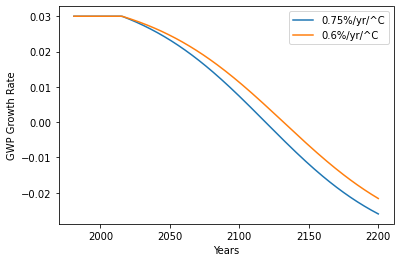

In [ ]:
plt.plot(df1['Years'],df1['GWP_growth_rate'],label='0.75%/yr/^C')
plt.plot(df2['Years'],df2['GWP_growth_rate'],label='0.6%/yr/^C')
plt.xlabel('Years')
plt.ylabel('GWP Growth Rate')
plt.legend(loc='best')

## BAU with half the original decay sensitivity
This time it will be 50% lower, so 0.375%/yr/^C)

In [ ]:
#creating lists of all PARAMETERS
#================================
#all other parameters will be the same

Sd50 = 0.00375 #NEW decay sensitivity to global mean surface temperature change (%/yr/^c) (0.75%/yr/^c)

In [ ]:
#calculating 1980 values (initial values for all variables in 1980)
#==================================================================

#already have initial capital (K_1980) and cumulative emissions (delta_u_1980) in parameters

y_1980 = A*K_1980 #GWP in 1980 (T$/yr)
u_1980 = (0.7*y_1980**0.6) #emissions rate in 1980 (GtC/yr)
delta_t_1980 = clim_sens*delta_u_1980 #global mean surface temp change in 1980 (^C)
d_1980_Sd50 = max(0.03,0.03+Sd50*(delta_t_1980-1)) #capital decay rate in 1980 (%/yr)

In [ ]:
#calculating 1981 values (these need to be calculated as there are still specific equations for this year that can't go in the loop)
#===================================================================================================================================

K_Sd50 = (K_1980)+(y_1980)-base_decay*K_1980 #capital in 1981 (T$)
y_Sd50 = A*K_Sd50 #GWP in 1981 (T$/yr)
u_Sd50 = (0.7*y_Sd50**0.6) #emissions rate in 1981 (GtC/yr)
delta_u_Sd50 = delta_u_1980+u_Sd50+land_change_emissions #cumulative emissions in 1981 (GtC)
delta_t_Sd50 = clim_sens*delta_u_Sd50 #global mean surface temp change in 1981 (^C)
d_Sd50 = max(0.03,0.03+Sd50*(delta_t_Sd50-1)) #capital decay rate in 1981 (%/yr)
y_growth_rate_Sd50 = (y_Sd50-y_1980)/y_1980 #GWP growth rate in 1981 (%/yr)

In [ ]:
#creating the list that the 1980, 1981 and eventually 1982-2100 will be appended to:
#===================================================================================

#cumulative emissions series:
delta_u_full_series_Sd50=[] #empty list for cumulative emissions
delta_u_full_series_Sd50.append(delta_u_1980) #adding the 1980 value
delta_u_full_series_Sd50.append(delta_u_Sd50) #adding the 1981 value
print(delta_u_full_series_Sd50)

#temperature change series:
delta_t_full_series_Sd50=[]
delta_t_full_series_Sd50.append(delta_t_1980)
delta_t_full_series_Sd50.append(delta_t_Sd50)
print(delta_t_full_series_Sd50)

#total capital series:
K_full_series_Sd50=[]
K_full_series_Sd50.append(K_1980)
K_full_series_Sd50.append(K_Sd50)
print(K_full_series_Sd50)

#emissions series:
u_full_series_Sd50=[]
u_full_series_Sd50.append(u_1980)
u_full_series_Sd50.append(u_Sd50)
print(u_full_series_Sd50)

#capital decay rate series:
d_full_series_Sd50=[]
d_full_series_Sd50.append(d_1980_Sd50)
d_full_series_Sd50.append(d_Sd50)
print(d_full_series_Sd50)

#GWP series:
y_full_series_Sd50=[]
y_full_series_Sd50.append(y_1980)
y_full_series_Sd50.append(y_Sd50)
print(y_full_series_Sd50)

#GWP growth rate series:
y_growth_rate_series_Sd50=[]
y_growth_rate_series_Sd50.append(0)
y_growth_rate_series_Sd50.append(y_growth_rate_Sd50)
print(y_growth_rate_series_Sd50)

[250, 256.6477640585382]
[0.45833333333333337, 0.4705209007739867]
[450, 463.5]
[5.057271839089452, 5.147764058538205]
[0.03, 0.03]
[27.0, 27.81]
[0, 0.029999999999999954]


In [ ]:
#creating an array of years between 1982-2100
#============================================
years_array=(np.array(years))


#go through loop for all variables to get from 1982 to 2100
#==========================================================
for x in range(0,years_array.size): #loop for the number of years between 1982-2100 (119)
  K_Sd50 = K_Sd50+y_Sd50-d_Sd50*K_Sd50
  y_Sd50 = A*K_Sd50
  u_Sd50 = (0.7*y_Sd50**0.6)
  delta_u_Sd50 = delta_u_Sd50+u_Sd50+land_change_emissions
  delta_t_Sd50 = clim_sens*delta_u_Sd50
  d_Sd50 = max(0.03,0.03+Sd50*(delta_t_Sd50-1))
  #y_growth_rate = (y-[y-1])/[y-1]
  delta_u_full_series_Sd50.append(delta_u_Sd50) #adding the 1982-2100 cumulative emissions values to the list in previous cell
  delta_t_full_series_Sd50.append(delta_t_Sd50) #adding the temp change from 1982-2100
  K_full_series_Sd50.append(K_Sd50) #adding 1982-2100 total capital to the list
  u_full_series_Sd50.append(u_Sd50) #adding 1982-2100 emissions to the list
  d_full_series_Sd50.append(d_Sd50) #adding 1982-2100 capital decay rate to the list
  y_full_series_Sd50.append(y_Sd50) #adding 1982-2100 GWP to the list

In [ ]:
df3=pd.DataFrame() #new dataframe with reduces decay sensitivity

df3['Years']=years_full
df3['capital']=K_full_series_Sd50
df3['GWP']=y_full_series_Sd50
df3['emissions']=u_full_series_Sd50
df3['cumulative_emissions']=delta_u_full_series_Sd50
df3['temp_change']=delta_t_full_series_Sd50
df3['decay_rate']=d_full_series_Sd50
df3['GWP_growth_rate']=df3['GWP'].pct_change()

In [ ]:
df3

,Years,capital,GWP,emissions,cumulative_emissions,temp_change,decay_rate,GWP_growth_rate
0,1980,450.000000,27.000000,5.057272,250.000000,0.458333,0.030000,NaN
1,1981,463.500000,27.810000,5.147764,256.647764,0.470521,0.030000,0.030000
2,1982,477.405000,28.644300,5.239875,263.387640,0.482877,0.030000,0.030000
3,1983,491.727150,29.503629,5.333635,270.221275,0.495406,0.030000,0.030000
4,1984,506.478964,30.388738,5.429072,277.150347,0.508109,0.030000,0.030000
...,...,...,...,...,...,...,...,...
216,2196,14406.861166,864.411670,40.469740,6582.352795,12.067647,0.071504,-0.011215
217,2197,14241.129311,854.467759,40.189763,6624.042558,12.144078,0.071790,-0.011504
218,2198,14073.222230,844.393334,39.904780,6665.447338,12.219987,0.072075,-0.011790
219,2199,13903.288769,834.197326,39.614969,6706.562306,12.295364,0.072358,-0.012075


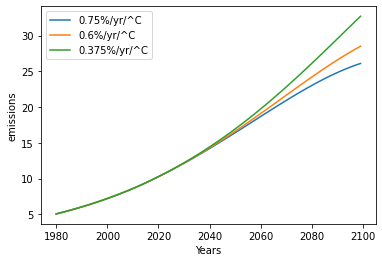

In [ ]:
plt.plot(df1['Years'][:120],df1['emissions'][:120],label='0.75%/yr/^C')
plt.plot(df2['Years'][:120],df2['emissions'][:120],label='0.6%/yr/^C')
plt.plot(df3['Years'][:120],df3['emissions'][:120],label='0.375%/yr/^C')
plt.xlabel('Years')
plt.ylabel('emissions')
plt.legend(loc='best')

In [ ]:
df3['emissions'][120]

33.05279819945958

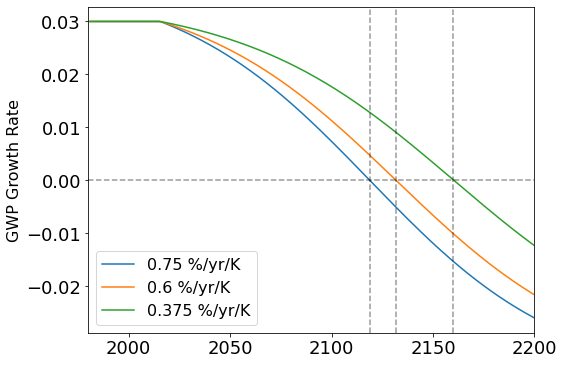

In [ ]:
plt.figure(figsize=[8,6])
plt.tick_params(axis='both', which='major', labelsize=18)

plt.plot(df1['Years'],df1['GWP_growth_rate'],label='0.75 %/yr/K')
plt.plot(df2['Years'],df2['GWP_growth_rate'],label='0.6 %/yr/K')
plt.plot(df3['Years'],df3['GWP_growth_rate'],label='0.375 %/yr/K')
plt.ylabel('GWP Growth Rate',fontsize=16)
#plt.title('Impact of varying decay sensitivity on GWP growth rate')
plt.axhline(y=0,color='black',linestyle='dashed',alpha=0.4)
plt.axvline(x=2119,color='black',linestyle='dashed',alpha=0.4)
plt.axvline(x=2132,color='black',linestyle='dashed',alpha=0.4)
plt.axvline(x=2160,color='black',linestyle='dashed',alpha=0.4)

plt.xlim(1980,2200)
plt.legend(loc='best',fontsize=16)

# Decarb scenario with original Sd (decay sensitivity) of 0.75%/yr

In [ ]:
import pandas as pd

In [ ]:
#creating lists of all PARAMETERS
#================================

years = list(range(1982,2101)) #list of years from 1982-2100 (1980-81 need to be calculated separately from the loop)
K_1980 = 450 #1980 total capital value (T$)
A = 0.06 #Total factor productivity (%/yr) (6%/yr)
sensitivity_GWP = 0.7 #emissions sensitivity to GWP (unitless) - 0.7 * capital^0.6
emissions_GWP_ratio = 0.6 #ratio of emissions to GWP growth
land_change_emissions = 1.5 #land use change emissions (GtC/yr)
delta_u_1980 = 250 #1980 cumulative emissions (GtC)
clim_sens = (1.1/600) #climate sensitivity (^c/GtC)
base_decay = 0.03 #base decay rate of capital (%/yr) (3%/yr)
Sd = 0.0075 #decay sensitivity to global mean surface temperature change (%/yr/^c) (0.75%/yr/^c)
#emissions_scale = 3.793 #total global CO2 emissions in 1980 / emissions_1980

In [ ]:
#calculating 1980 values (initial values for all variables in 1980)
#==================================================================

#already have initial capital (K_1980) and cumulative emissions (delta_u_1980) in parameters

y_1980 = A*K_1980 #GWP in 1980 (T$/yr)
u_1980 = (0.7*y_1980**0.6) #emissions rate in 1980 (GtC/yr)
delta_t_1980 = clim_sens*delta_u_1980 #global mean surface temp change in 1980 (^C)
d_1980 = max(0.03,0.03+Sd*(delta_t_1980-1)) #capital decay rate in 1980 (%/yr)

In [ ]:
#calculating 1981 values (these need to be calculated as there are still specific equations for this year that can't go in the loop)
#===================================================================================================================================

K = (K_1980)+(y_1980)-base_decay*K_1980 #capital in 1981 (T$)
y = A*K #GWP in 1981 (T$/yr)
u = (0.7*y**0.6) #emissions rate in 1981 (GtC/yr)
delta_u = delta_u_1980+u+land_change_emissions #cumulative emissions in 1981 (GtC)
delta_t = clim_sens*delta_u #global mean surface temp change in 1981 (^C)
d = max(0.03,0.03+Sd*(delta_t-1)) #capital decay rate in 1981 (%/yr)
y_growth_rate = (y-y_1980)/y_1980 #GWP growth rate in 1981 (%/yr)

In [ ]:
#creating the list that the 1980, 1981 and eventually 1982-2100 will be appended to:
#===================================================================================

#cumulative emissions series:
delta_u_full_series=[] #empty list for cumulative emissions
delta_u_full_series.append(delta_u_1980) #adding the 1980 value
delta_u_full_series.append(delta_u) #adding the 1981 value
print(delta_u_full_series)

#temperature change series:
delta_t_full_series=[]
delta_t_full_series.append(delta_t_1980)
delta_t_full_series.append(delta_t)
print(delta_t_full_series)

#total capital series:
K_full_series=[]
K_full_series.append(K_1980)
K_full_series.append(K)
print(K_full_series)

#emissions series:
u_full_series=[]
u_full_series.append(u_1980)
u_full_series.append(u)
print(u_full_series)

#capital decay rate series:
d_full_series=[]
d_full_series.append(d_1980)
d_full_series.append(d)
print(d_full_series)

#GWP series:
y_full_series=[]
y_full_series.append(y_1980)
y_full_series.append(y)
print(y_full_series)

#GWP growth rate series:
y_growth_rate_series=[]
y_growth_rate_series.append(0)
y_growth_rate_series.append(y_growth_rate)
print(y_growth_rate_series)

[250, 256.6477640585382]
[0.45833333333333337, 0.4705209007739867]
[450, 463.5]
[5.057271839089452, 5.147764058538205]
[0.03, 0.03]
[27.0, 27.81]
[0, 0.029999999999999954]


In [ ]:
#creating an array of years between 1982-2100
#============================================
years_array=(np.array(years))


#go through loop for all variables to get from 1982 to 2100
#==========================================================
for x in range(0,years_array.size): #loop for the number of years between 1982-2100 (119)
  K = K+y-d*K
  y = A*K
  u = (0.7*y**0.6)
  delta_u = delta_u+u+land_change_emissions
  delta_t = clim_sens*delta_u
  d = max(0.03,0.03+Sd*(delta_t-1))
  #y_growth_rate = (y-[y-1])/[y-1]
  delta_u_full_series.append(delta_u) #adding the 1982-2100 cumulative emissions values to the list in previous cell
  delta_t_full_series.append(delta_t) #adding the temp change from 1982-2100
  K_full_series.append(K) #adding 1982-2100 total capital to the list
  u_full_series.append(u) #adding 1982-2100 emissions to the list
  d_full_series.append(d) #adding 1982-2100 capital decay rate to the list
  y_full_series.append(y) #adding 1982-2100 GWP to the list

In [ ]:
#creating an array that includes all years from 1980-2100
#========================================================
years_full = list(range(1980,2101)) #creating a new years array so that 1980 and 1981 are included and x and y shapes match
years_array_full=(np.array(years_full))

In [ ]:
df1=pd.DataFrame()

df1['Years']=years_full
df1['capital']=K_full_series
df1['GWP']=y_full_series
df1['emissions']=u_full_series
df1['cumulative_emissions']=delta_u_full_series
df1['temp_change']=delta_t_full_series
df1['decay_rate']=d_full_series
df1['GWP_growth_rate']=df1['GWP'].pct_change()

In [ ]:
#setting out the initial values for the HCE and LCE split in 2020
#================================================================

#Capital in 2020
HCE_K_2020=df1['capital'][40]*0.8 #High Carbon Economy total capital in 2020 (T$)
LCE_K_2020=df1['capital'][40]*0.2 #Low Carbon Economy total capital in 2020 (T$)

In [ ]:
#parameters needed for GWP calculations:

A=0.06 #aggregate energy productivity (%) (6%)
h=0.95 #how productive the LCE is compared to the HCE (%) (95%)
A_HCE=A/(0.8+0.2*h) #High Carbon Economy productivity (%)
A_LCE=h*A_HCE #Low Carbon Economy productivity (%)

#GWP
HCE_GWP_2020=HCE_K_2020*A_HCE #High Carbon Economy GWP in 2020 (T$/yr)
LCE_GWP_2020=LCE_K_2020*A_LCE #Low Carbon Economy GWP in 2020 (T$/yr)
Total_GWP_2020=HCE_GWP_2020+LCE_GWP_2020 #Total GWP in 2020(T$/yr)

#carbon intensity parameter
HCE_C_intensity_2020=df1['emissions'][40]/HCE_GWP_2020 #carbon intensity of the High Carbon Economy in 2020 (effects the emissions rate)
u_2020=HCE_C_intensity_2020*HCE_GWP_2020 #emissions in 2020 (GtC/yr), using the carbon intensity of HCE GWP in 2020

#setting the remaining 2020 values needed
delta_u_2020=df1['cumulative_emissions'][40] #cumulative emissions in 2020 (GtC)
delta_t_2020=df1['temp_change'][40] #temperature change in 2020 (^c)
d_2020=df1['decay_rate'][40] #high carbon infrastructure decay rate in 2020(%/yr) (3.08%/yr)

In [ ]:
#2021 values for decarbonisation scenario:
#=========================================

HCE_K=HCE_K_2020-d_2020*HCE_K_2020 #High Carbon Economy capital in 2021 (T$)
LCE_K=LCE_K_2020+Total_GWP_2020-d_2020*LCE_K_2020 #Low Carbon Economy capital in 2021 (T$)

HCE_GWP=HCE_K*A_HCE #High Carbon Economy GWP in 2021 (T$/yr)
LCE_GWP=LCE_K*A_LCE #Low Carbon Economy GWP in 2021 (T$/yr)
u_decarb=HCE_C_intensity_2020*HCE_GWP #total economy emissions in 2021 (GtC/yr)
delta_u_decarb=delta_u_2020+u_2020+land_change_emissions #total economy cumulative emissions in 2021 (GtC)
delta_t_decarb=clim_sens*delta_u_decarb #total economy temp change in 2021 (^c)
d_decarb=max(0.03,0.03+Sd*(delta_t_decarb-1)) #high carbon infrastructure decay rate (%/yr) in 2021
Total_GWP=HCE_GWP+LCE_GWP #total GWP in 2021 (T$/yr)

In [ ]:
#creating the list that the 2020, 2021 and eventually 2022-2100 will be appended to:
#===================================================================================

#capital series:
HCE_K_full_series=[] #empty list for HCE capital 
HCE_K_full_series.append(HCE_K_2020) #adding the 2020 value to the list
HCE_K_full_series.append(HCE_K) #adding the 2021 value to the list
print(HCE_K_full_series)

LCE_K_full_series=[] #empty list for LCE capital
LCE_K_full_series.append(LCE_K_2020) #adding the 2020 value to the list
LCE_K_full_series.append(LCE_K) #adding the 2021 value to the list
print(LCE_K_full_series)


#GWP series:
HCE_GWP_full_series=[] #empty list for HCE GWP
HCE_GWP_full_series.append(HCE_GWP_2020)
HCE_GWP_full_series.append(HCE_GWP)
print(HCE_GWP_full_series)

LCE_GWP_full_series=[] #empty list for LCE GWP
LCE_GWP_full_series.append(LCE_GWP_2020)
LCE_GWP_full_series.append(LCE_GWP)
print(LCE_GWP_full_series)

Total_GWP_full_series=[] #empty list for total economy GWP 
Total_GWP_full_series.append(Total_GWP_2020)
Total_GWP_full_series.append(Total_GWP)
print(Total_GWP_full_series)


#emissions series:
u_full_series_decarb=[] #empty list for total economy emissions
u_full_series_decarb.append(u_2020)
u_full_series_decarb.append(u_decarb)
print(u_full_series_decarb)


#cumulative emissions series:
delta_u_full_series_decarb=[] #empty list for cumulative emissions
delta_u_full_series_decarb.append(delta_u_2020) 
delta_u_full_series_decarb.append(delta_u_decarb)
print(delta_u_full_series_decarb)


#temperature change series:
delta_t_full_series_decarb=[] #empty list for total economy temp change 
delta_t_full_series_decarb.append(delta_t_2020)
delta_t_full_series_decarb.append(delta_t_decarb)
print(delta_t_full_series_decarb)


#high C infrastructure decay rate series:
d_full_series_decarb=[] #empty list for high C infrastructure decay rate
d_full_series_decarb.append(d_2020)
d_full_series_decarb.append(d_decarb)
print(d_full_series_decarb)

[1172.215703580962, 1136.0556313172]
[293.0539258952405, 371.93008559787216]
[71.04337597460376, 68.85185644346667]
[16.872801793968392, 21.41415644351385]
[87.91617776857215, 90.26601288698052]
[10.269264008636307, 9.952481587522554]
[607.1001129537939, 618.8693769624302]
[1.1130168737486221, 1.1345938577644556]
[0.030847626553114665, 0.031009453933233417]


In [ ]:
#creating an array of years between 2022-2100
#============================================
years_decarb = list(range(2022,2101)) #YEARS
years_array_decarb=(np.array(years_decarb))


#go through loop for all variables to get from 2022 to 2100
#==========================================================
for x in range(0,years_array_decarb.size): #loop for the number of years between 2022-2100
  delta_u_decarb = delta_u_decarb+u_decarb+land_change_emissions #cumulative emissions equation (GtC)
  HCE_K = HCE_K-d_decarb*HCE_K #HCE capital (T$)
  LCE_K = LCE_K+Total_GWP-d_decarb*LCE_K #LCE capital (T$)
  HCE_GWP = A_HCE*HCE_K #HCE GWP (T$/yr)
  LCE_GWP = A_LCE*LCE_K #LCE GWP (T$/yr)
  Total_GWP = HCE_GWP+LCE_GWP #Total economy GWP (T$/yr)
  u_decarb = HCE_C_intensity_2020*HCE_GWP #emissions from HCE sector (GtC/yr) 
  delta_t_decarb = clim_sens*delta_u_decarb # temp change (^C)
  d_decarb = max(0.03,0.03+Sd*(delta_t_decarb-1)) #high C capital decay rate (%/yr)

  #appending values created in loop to their subsequent lists
  delta_u_full_series_decarb.append(delta_u_decarb) #adding the 2022-2100 cumulative emissions values to the list in previous cell
  delta_t_full_series_decarb.append(delta_t_decarb) #adding the temp change from 2022-2100
  HCE_K_full_series.append(HCE_K) #adding 2022-2100 HCE capital to the list
  LCE_K_full_series.append(LCE_K) #adding 2022-2100 LCE capital to the list
  HCE_GWP_full_series.append(HCE_GWP)
  LCE_GWP_full_series.append(LCE_GWP)
  Total_GWP_full_series.append(Total_GWP)
  u_full_series_decarb.append(u_decarb)
  d_full_series_decarb.append(d_decarb)

In [ ]:
years_full_decarb = list(range(2020,2101)) #creating a new years array so that 2020 and 1981 are included and x and y shapes match

In [ ]:
df2= pd.DataFrame()

df2['Years']=years_full_decarb
df2['HCE capital']=HCE_K_full_series
df2['HCE GWP']=HCE_GWP_full_series
df2['HCE GWP growth rate']=df2['HCE GWP'].pct_change()
df2['LCE capital']=LCE_K_full_series
df2['LCE GWP']=LCE_GWP_full_series
df2['LCE GWP growth rate']=df2['LCE GWP'].pct_change()
df2['emissions']=u_full_series_decarb
df2['cumulative emissions']=delta_u_full_series_decarb
df2['temp change']=delta_t_full_series_decarb
df2['decay rate']=d_full_series_decarb
df2['capital']=df2['HCE capital']+df2['LCE capital']
df2['GWP']=Total_GWP_full_series
df2['total GWP growth rate']=df2['GWP'].pct_change()

In [ ]:
df2

,Years,HCE capital,HCE GWP,HCE GWP growth rate,LCE capital,LCE GWP,LCE GWP growth rate,emissions,cumulative emissions,temp change,decay rate,capital,GWP,total GWP growth rate
0,2020,1172.215704,71.043376,NaN,293.053926,16.872802,NaN,10.269264,607.100113,1.113017,0.030848,1465.269629,87.916178,NaN
1,2021,1136.055631,68.851856,-0.030848,371.930086,21.414156,0.269152,9.952482,618.869377,1.134594,0.031009,1507.985717,90.266013,0.026728
2,2022,1100.827167,66.716798,-0.031009,450.662750,25.947249,0.211687,9.643861,630.321859,1.155590,0.031167,1551.489916,92.664047,0.026566
3,2023,1066.517768,64.637440,-0.031167,529.281024,30.473756,0.174450,9.343291,641.465719,1.176020,0.031320,1595.798793,95.111196,0.026409
4,2024,1033.114268,62.612986,-0.031320,607.815058,34.995412,0.148379,9.050658,652.309010,1.195900,0.031469,1640.929326,97.608398,0.026256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,2096,82.283409,4.986873,-0.036333,8656.508019,498.405007,0.021853,0.720849,1008.296409,1.848543,0.036364,8738.791428,503.391880,0.021243
77,2097,79.291249,4.805530,-0.036364,8845.113987,509.264139,0.021788,0.694636,1010.517257,1.852615,0.036395,8924.405236,514.069669,0.021212
78,2098,76.405475,4.630635,-0.036395,9037.269161,520.327618,0.021724,0.669355,1012.711893,1.856638,0.036425,9113.674636,524.958253,0.021181
79,2099,73.622422,4.461965,-0.036425,9233.046797,531.599664,0.021663,0.644974,1014.881248,1.860616,0.036455,9306.669218,536.061629,0.021151


Text(0, 0.5, 'Temperature Change')

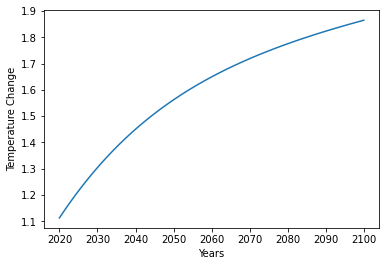

In [ ]:
plt.plot(df2['Years'],df2['temp change'])
plt.xlabel('Years')
plt.ylabel('Temperature Change')

# Decarb scenario but with double the decay sensitivity rate (1.5%/yr/^c)

In [ ]:
Sd_x2 = 0.0075*2 #decay sensitivity to global mean surface temperature change (%/yr/^c) (1.5%/yr/^c)

In [ ]:
#calculating 1980 values (initial values for all variables in 1980)
#==================================================================

#already have initial capital (K_1980) and cumulative emissions (delta_u_1980) in parameters

y_1980_x2 = A*K_1980 #GWP in 1980 (T$/yr)
u_1980_x2 = (0.7*y_1980_x2**0.6) #emissions rate in 1980 (GtC/yr)
delta_t_1980_x2 = clim_sens*delta_u_1980 #global mean surface temp change in 1980 (^C)
d_1980_x2 = max(0.03,0.03+Sd_x2*(delta_t_1980_x2-1)) #capital decay rate in 1980 (%/yr)

In [ ]:
#calculating 1981 values (these need to be calculated as there are still specific equations for this year that can't go in the loop)
#===================================================================================================================================

K_x2 = (K_1980)+(y_1980_x2)-base_decay*K_1980 #capital in 1981 (T$)
y_x2 = A*K_x2 #GWP in 1981 (T$/yr)
u_x2 = (0.7*y_x2**0.6) #emissions rate in 1981 (GtC/yr)
delta_u_x2 = delta_u_1980+u_x2+land_change_emissions #cumulative emissions in 1981 (GtC)
delta_t_x2 = clim_sens*delta_u_x2 #global mean surface temp change in 1981 (^C)
d_x2 = max(0.03,0.03+Sd_x2*(delta_t_x2-1)) #capital decay rate in 1981 (%/yr)
y_growth_rate_x2 = (y_x2-y_1980_x2)/y_1980_x2 #GWP growth rate in 1981 (%/yr)

In [ ]:
#creating the list that the 1980, 1981 and eventually 1982-2100 will be appended to:
#===================================================================================

#cumulative emissions series:
delta_u_full_series_x2=[] #empty list for cumulative emissions
delta_u_full_series_x2.append(delta_u_1980) #adding the 1980 value
delta_u_full_series_x2.append(delta_u_x2) #adding the 1981 value
print(delta_u_full_series_x2)

#temperature change series:
delta_t_full_series_x2=[]
delta_t_full_series_x2.append(delta_t_1980_x2)
delta_t_full_series_x2.append(delta_t_x2)
print(delta_t_full_series_x2)

#total capital series:
K_full_series_x2=[]
K_full_series_x2.append(K_1980)
K_full_series_x2.append(K_x2)
print(K_full_series_x2)

#emissions series:
u_full_series_x2=[]
u_full_series_x2.append(u_1980_x2)
u_full_series_x2.append(u_x2)
print(u_full_series_x2)

#capital decay rate series:
d_full_series_x2=[]
d_full_series_x2.append(d_1980_x2)
d_full_series_x2.append(d_x2)
print(d_full_series_x2)

#GWP series:
y_full_series_x2=[]
y_full_series_x2.append(y_1980_x2)
y_full_series_x2.append(y_x2)
print(y_full_series_x2)

#GWP growth rate series:
y_growth_rate_series_x2=[]
y_growth_rate_series_x2.append(0)
y_growth_rate_series_x2.append(y_growth_rate_x2)
print(y_growth_rate_series_x2)

[250, 256.6477640585382]
[0.45833333333333337, 0.4705209007739867]
[450, 463.5]
[5.057271839089452, 5.147764058538205]
[0.03, 0.03]
[27.0, 27.81]
[0, 0.029999999999999954]


In [ ]:
#creating an array of years between 1982-2100
#============================================
years_array=(np.array(years))


#go through loop for all variables to get from 1982 to 2100
#==========================================================
for x in range(0,years_array.size): #loop for the number of years between 1982-2100 (119)
  K_x2 = K_x2+y_x2-d_x2*K_x2
  y_x2 = A*K_x2
  u_x2 = (0.7*y_x2**0.6)
  delta_u_x2 = delta_u_x2+u_x2+land_change_emissions
  delta_t_x2 = clim_sens*delta_u_x2
  d_x2 = max(0.03,0.03+Sd_x2*(delta_t_x2-1))
  #y_growth_rate = (y-[y-1])/[y-1]
  delta_u_full_series_x2.append(delta_u_x2) #adding the 1982-2100 cumulative emissions values to the list in previous cell
  delta_t_full_series_x2.append(delta_t_x2) #adding the temp change from 1982-2100
  K_full_series_x2.append(K_x2) #adding 1982-2100 total capital to the list
  u_full_series_x2.append(u_x2) #adding 1982-2100 emissions to the list
  d_full_series_x2.append(d_x2) #adding 1982-2100 capital decay rate to the list
  y_full_series_x2.append(y_x2) #adding 1982-2100 GWP to the list

In [ ]:
#creating an array that includes all years from 1980-2100
#========================================================
years_full = list(range(1980,2101)) #creating a new years array so that 1980 and 1981 are included and x and y shapes match
years_array_full=(np.array(years_full))

In [ ]:
df4=pd.DataFrame()

df4['Years']=years_full
df4['capital']=K_full_series_x2
df4['GWP']=y_full_series_x2
df4['emissions']=u_full_series_x2
df4['cumulative_emissions']=delta_u_full_series_x2
df4['temp_change']=delta_t_full_series_x2
df4['decay_rate']=d_full_series_x2
df4['GWP_growth_rate']=df4['GWP'].pct_change()

In [ ]:
#setting out the initial values for the HCE and LCE split in 2020
#================================================================

#Capital in 2020
HCE_K_2020_x2=df4['capital'][40]*0.8 #High Carbon Economy total capital in 2020 (T$)
LCE_K_2020_x2=df4['capital'][40]*0.2 #Low Carbon Economy total capital in 2020 (T$)

In [ ]:
#parameters needed for GWP calculations:

A=0.06 #aggregate energy productivity (%) (6%)
h=0.95 #how productive the LCE is compared to the HCE (%) (95%)
A_HCE=A/(0.8+0.2*h) #High Carbon Economy productivity (%)
A_LCE=h*A_HCE #Low Carbon Economy productivity (%)

#GWP
HCE_GWP_2020_x2=HCE_K_2020_x2*A_HCE #High Carbon Economy GWP in 2020 (T$/yr)
LCE_GWP_2020_x2=LCE_K_2020_x2*A_LCE #Low Carbon Economy GWP in 2020 (T$/yr)
Total_GWP_2020_x2=HCE_GWP_2020_x2+LCE_GWP_2020_x2 #Total GWP in 2020(T$/yr)

#carbon intensity parameter
HCE_C_intensity_2020_x2=df4['emissions'][40]/HCE_GWP_2020_x2 #carbon intensity of the High Carbon Economy in 2020 (effects the emissions rate)
u_2020_x2=HCE_C_intensity_2020_x2*HCE_GWP_2020_x2 #emissions in 2020 (GtC/yr), using the carbon intensity of HCE GWP in 2020

#setting the remaining 2020 values needed
delta_u_2020_x2=df4['cumulative_emissions'][40] #cumulative emissions in 2020 (GtC)
delta_t_2020_x2=df4['temp_change'][40] #temperature change in 2020 (^c)
d_2020_x2=df4['decay_rate'][40] #high carbon infrastructure decay rate in 2020(%/yr) (3.08%/yr)

In [ ]:
#2021 values for decarbonisation scenario:
#=========================================

HCE_K_x2=HCE_K_2020_x2-d_2020_x2*HCE_K_2020_x2 #High Carbon Economy capital in 2021 (T$)
LCE_K_x2=LCE_K_2020_x2+Total_GWP_2020_x2-d_2020_x2*LCE_K_2020_x2 #Low Carbon Economy capital in 2021 (T$)

HCE_GWP_x2=HCE_K_x2*A_HCE #High Carbon Economy GWP in 2021 (T$/yr)
LCE_GWP_x2=LCE_K_x2*A_LCE #Low Carbon Economy GWP in 2021 (T$/yr)
u_decarb_x2=HCE_C_intensity_2020_x2*HCE_GWP_x2 #total economy emissions in 2021 (GtC/yr)
delta_u_decarb_x2=delta_u_2020_x2+u_2020_x2+land_change_emissions #total economy cumulative emissions in 2021 (GtC)
delta_t_decarb_x2=clim_sens*delta_u_decarb_x2 #total economy temp change in 2021 (^c)
d_decarb_x2=max(0.03,0.03+Sd_x2*(delta_t_decarb_x2-1)) #high carbon infrastructure decay rate (%/yr) in 2021
Total_GWP_x2=HCE_GWP_x2+LCE_GWP_x2 #total GWP in 2021 (T$/yr)

In [ ]:
#creating the list that the 2020, 2021 and eventually 2022-2100 will be appended to:
#===================================================================================

#capital series:
HCE_K_full_series_x2=[] #empty list for HCE capital 
HCE_K_full_series_x2.append(HCE_K_2020_x2) #adding the 2020 value to the list
HCE_K_full_series_x2.append(HCE_K_x2) #adding the 2021 value to the list
print(HCE_K_full_series_x2)

LCE_K_full_series_x2=[] #empty list for LCE capital
LCE_K_full_series_x2.append(LCE_K_2020_x2) #adding the 2020 value to the list
LCE_K_full_series_x2.append(LCE_K_x2) #adding the 2021 value to the list
print(LCE_K_full_series_x2)


#GWP series:
HCE_GWP_full_series_x2=[] #empty list for HCE GWP
HCE_GWP_full_series_x2.append(HCE_GWP_2020_x2)
HCE_GWP_full_series_x2.append(HCE_GWP_x2)
print(HCE_GWP_full_series_x2)

LCE_GWP_full_series_x2=[] #empty list for LCE GWP
LCE_GWP_full_series_x2.append(LCE_GWP_2020_x2)
LCE_GWP_full_series_x2.append(LCE_GWP_x2)
print(LCE_GWP_full_series_x2)

Total_GWP_full_series_x2=[] #empty list for total economy GWP 
Total_GWP_full_series_x2.append(Total_GWP_2020_x2)
Total_GWP_full_series_x2.append(Total_GWP_x2)
print(Total_GWP_full_series_x2)


#emissions series:
u_full_series_decarb_x2=[] #empty list for total economy emissions
u_full_series_decarb_x2.append(u_2020_x2)
u_full_series_decarb_x2.append(u_decarb_x2)
print(u_full_series_decarb_x2)


#cumulative emissions series:
delta_u_full_series_decarb_x2=[] #empty list for cumulative emissions
delta_u_full_series_decarb_x2.append(delta_u_2020_x2) 
delta_u_full_series_decarb_x2.append(delta_u_decarb_x2)
print(delta_u_full_series_decarb_x2)


#temperature change series:
delta_t_full_series_decarb_x2=[] #empty list for total economy temp change 
delta_t_full_series_decarb_x2.append(delta_t_2020_x2)
delta_t_full_series_decarb_x2.append(delta_t_decarb_x2)
print(delta_t_full_series_decarb_x2)


#high C infrastructure decay rate series:
d_full_series_decarb_x2=[] #empty list for high C infrastructure decay rate
d_full_series_decarb_x2.append(d_2020_x2)
d_full_series_decarb_x2.append(d_decarb_x2)
print(d_full_series_decarb_x2)

[1170.1012312584905, 1133.0153383628435]
[292.52530781462264, 371.0114269350977]
[70.91522613687822, 68.66759626441475]
[16.842366207508576, 21.361263975051077]
[87.7575923443868, 90.02886023946583]
[10.25814562074944, 9.933017777417547]
[607.0764385763189, 618.8345841970684]
[1.1129734707232515, 1.1345300710279587]
[0.03169460206084877, 0.03201795106541938]


In [ ]:
#creating an array of years between 2022-2100
#============================================
years_decarb = list(range(2022,2101)) #YEARS
years_array_decarb=(np.array(years_decarb))


#go through loop for all variables to get from 2022 to 2100
#==========================================================
for x in range(0,years_array_decarb.size): #loop for the number of years between 2022-2100
  delta_u_decarb_x2 = delta_u_decarb_x2+u_decarb_x2+land_change_emissions #cumulative emissions equation (GtC)
  HCE_K_x2 = HCE_K_x2-d_decarb_x2*HCE_K_x2 #HCE capital (T$)
  LCE_K_x2 = LCE_K_x2+Total_GWP_x2-d_decarb_x2*LCE_K_x2 #LCE capital (T$)
  HCE_GWP_x2 = A_HCE*HCE_K_x2 #HCE GWP (T$/yr)
  LCE_GWP_x2 = A_LCE*LCE_K_x2 #LCE GWP (T$/yr)
  Total_GWP_x2 = HCE_GWP_x2+LCE_GWP_x2 #Total economy GWP (T$/yr)
  u_decarb_x2 = HCE_C_intensity_2020_x2*HCE_GWP_x2 #emissions from HCE sector (GtC/yr) 
  delta_t_decarb_x2 = clim_sens*delta_u_decarb_x2 # temp change (^C)
  d_decarb_x2 = max(0.03,0.03+Sd_x2*(delta_t_decarb_x2-1)) #high C capital decay rate (%/yr)

  #appending values created in loop to their subsequent lists
  delta_u_full_series_decarb_x2.append(delta_u_decarb_x2) #adding the 2022-2100 cumulative emissions values to the list in previous cell
  delta_t_full_series_decarb_x2.append(delta_t_decarb_x2) #adding the temp change from 2022-2100
  HCE_K_full_series_x2.append(HCE_K_x2) #adding 2022-2100 HCE capital to the list
  LCE_K_full_series_x2.append(LCE_K_x2) #adding 2022-2100 LCE capital to the list
  HCE_GWP_full_series_x2.append(HCE_GWP_x2)
  LCE_GWP_full_series_x2.append(LCE_GWP_x2)
  Total_GWP_full_series_x2.append(Total_GWP_x2)
  u_full_series_decarb_x2.append(u_decarb_x2)
  d_full_series_decarb_x2.append(d_decarb_x2)

In [ ]:
df5= pd.DataFrame()

df5['Years']=years_full_decarb
df5['HCE capital']=HCE_K_full_series_x2
df5['HCE GWP']=HCE_GWP_full_series_x2
df5['HCE GWP growth rate']=df5['HCE GWP'].pct_change()
df5['LCE capital']=LCE_K_full_series_x2
df5['LCE GWP']=LCE_GWP_full_series_x2
df5['LCE GWP growth rate']=df5['LCE GWP'].pct_change()
df5['emissions']=u_full_series_decarb_x2
df5['cumulative emissions']=delta_u_full_series_decarb_x2
df5['temp change']=delta_t_full_series_decarb_x2
df5['decay rate']=d_full_series_decarb_x2
df5['capital']=df2['HCE capital']+df5['LCE capital']
df5['GWP']=Total_GWP_full_series_x2
df5['total GWP growth rate']=df5['GWP'].pct_change()

In [ ]:
df5

,Years,HCE capital,HCE GWP,HCE GWP growth rate,LCE capital,LCE GWP,LCE GWP growth rate,emissions,cumulative emissions,temp change,decay rate,capital,GWP,total GWP growth rate
0,2020,1170.101231,70.915226,NaN,292.525308,16.842366,NaN,10.258146,607.076439,1.112973,0.031695,1464.741011,87.757592,NaN
1,2021,1133.015338,68.667596,-0.031695,371.011427,21.361264,0.268305,9.933018,618.834584,1.134530,0.032018,1507.067058,90.028860,0.025881
2,2022,1096.738509,66.469001,-0.032018,449.161261,25.860800,0.210640,9.614983,630.267602,1.155491,0.032332,1549.988428,92.329800,0.025558
3,2023,1061.278365,64.319901,-0.032332,526.968619,30.340617,0.173228,9.304108,641.382585,1.175868,0.032638,1593.486387,94.660518,0.025243
4,2024,1026.640340,62.220627,-0.032638,604.429924,34.800511,0.146994,9.000440,652.186693,1.195676,0.032935,1637.544192,97.021137,0.024938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,2096,59.276663,3.592525,-0.042173,6353.100072,365.784550,0.016002,0.519672,990.167206,1.815307,0.042230,6435.383481,369.377075,0.015402
77,2097,56.773433,3.440814,-0.042230,6454.188284,371.604780,0.015912,0.497726,992.186878,1.819009,0.042285,6533.479533,375.045594,0.015346
78,2098,54.372761,3.295319,-0.042285,6556.317628,377.484954,0.015824,0.476680,994.184604,1.822672,0.042340,6632.723103,380.780273,0.015291
79,2099,52.070614,3.155795,-0.042340,6659.502910,383.425925,0.015738,0.456497,996.161284,1.826296,0.042394,6733.125332,386.581720,0.015236


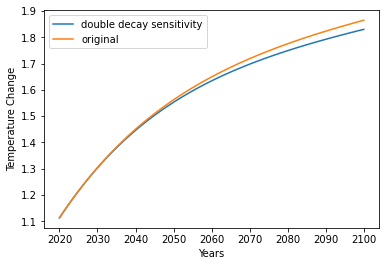

In [ ]:
plt.plot(df5['Years'],df5['temp change'],label='double decay sensitivity')
plt.plot(df2['Years'],df2['temp change'],label='original')
plt.xlabel('Years')
plt.ylabel('Temperature Change')
plt.legend(loc='best')

# Decarb scenario with 4x decay sensitivity (3.0%/yr/^c)

In [ ]:
Sd_x4 = 0.0075*4 #decay sensitivity to global mean surface temperature change (%/yr/^c) (1.5%/yr/^c)

In [ ]:
#calculating 1980 values (initial values for all variables in 1980)
#==================================================================

#already have initial capital (K_1980) and cumulative emissions (delta_u_1980) in parameters

y_1980_x4 = A*K_1980 #GWP in 1980 (T$/yr)
u_1980_x4 = (0.7*y_1980_x4**0.6) #emissions rate in 1980 (GtC/yr)
delta_t_1980_x4 = clim_sens*delta_u_1980 #global mean surface temp change in 1980 (^C)
d_1980_x4 = max(0.03,0.03+Sd_x4*(delta_t_1980_x4-1)) #capital decay rate in 1980 (%/yr)

In [ ]:
#calculating 1981 values (these need to be calculated as there are still specific equations for this year that can't go in the loop)
#===================================================================================================================================

K_x4 = (K_1980)+(y_1980_x4)-base_decay*K_1980 #capital in 1981 (T$)
y_x4 = A*K_x4 #GWP in 1981 (T$/yr)
u_x4 = (0.7*y_x4**0.6) #emissions rate in 1981 (GtC/yr)
delta_u_x4 = delta_u_1980+u_x4+land_change_emissions #cumulative emissions in 1981 (GtC)
delta_t_x4 = clim_sens*delta_u_x4 #global mean surface temp change in 1981 (^C)
d_x4 = max(0.03,0.03+Sd_x4*(delta_t_x4-1)) #capital decay rate in 1981 (%/yr)
y_growth_rate_x4 = (y_x4-y_1980_x4)/y_1980_x4 #GWP growth rate in 1981 (%/yr)

In [ ]:
#creating the list that the 1980, 1981 and eventually 1982-2100 will be appended to:
#===================================================================================

#cumulative emissions series:
delta_u_full_series_x4=[] #empty list for cumulative emissions
delta_u_full_series_x4.append(delta_u_1980) #adding the 1980 value
delta_u_full_series_x4.append(delta_u_x4) #adding the 1981 value
print(delta_u_full_series_x4)

#temperature change series:
delta_t_full_series_x4=[]
delta_t_full_series_x4.append(delta_t_1980_x4)
delta_t_full_series_x4.append(delta_t_x4)
print(delta_t_full_series_x4)

#total capital series:
K_full_series_x4=[]
K_full_series_x4.append(K_1980)
K_full_series_x4.append(K_x4)
print(K_full_series_x4)

#emissions series:
u_full_series_x4=[]
u_full_series_x4.append(u_1980_x4)
u_full_series_x4.append(u_x4)
print(u_full_series_x4)

#capital decay rate series:
d_full_series_x4=[]
d_full_series_x4.append(d_1980_x4)
d_full_series_x4.append(d_x4)
print(d_full_series_x4)

#GWP series:
y_full_series_x4=[]
y_full_series_x4.append(y_1980_x4)
y_full_series_x4.append(y_x4)
print(y_full_series_x4)

#GWP growth rate series:
y_growth_rate_series_x4=[]
y_growth_rate_series_x4.append(0)
y_growth_rate_series_x4.append(y_growth_rate_x4)
print(y_growth_rate_series_x4)

[250, 256.6477640585382]
[0.45833333333333337, 0.4705209007739867]
[450, 463.5]
[5.057271839089452, 5.147764058538205]
[0.03, 0.03]
[27.0, 27.81]
[0, 0.029999999999999954]


In [ ]:
#creating an array of years between 1982-2100
#============================================
years_array=(np.array(years))


#go through loop for all variables to get from 1982 to 2100
#==========================================================
for x in range(0,years_array.size): #loop for the number of years between 1982-2100 (119)
  K_x4 = K_x4+y_x4-d_x4*K_x4
  y_x4 = A*K_x4
  u_x4 = (0.7*y_x4**0.6)
  delta_u_x4 = delta_u_x4+u_x4+land_change_emissions
  delta_t_x4 = clim_sens*delta_u_x4
  d_x4 = max(0.03,0.03+Sd_x4*(delta_t_x4-1))
  #y_growth_rate = (y-[y-1])/[y-1]
  delta_u_full_series_x4.append(delta_u_x4) #adding the 1982-2100 cumulative emissions values to the list in previous cell
  delta_t_full_series_x4.append(delta_t_x4) #adding the temp change from 1982-2100
  K_full_series_x4.append(K_x4) #adding 1982-2100 total capital to the list
  u_full_series_x4.append(u_x4) #adding 1982-2100 emissions to the list
  d_full_series_x4.append(d_x4) #adding 1982-2100 capital decay rate to the list
  y_full_series_x4.append(y_x4) #adding 1982-2100 GWP to the list

In [ ]:
#creating an array that includes all years from 1980-2100
#========================================================
years_full = list(range(1980,2101)) #creating a new years array so that 1980 and 1981 are included and x and y shapes match
years_array_full=(np.array(years_full))

In [ ]:
df6=pd.DataFrame()

df6['Years']=years_full
df6['capital']=K_full_series_x4
df6['GWP']=y_full_series_x4
df6['emissions']=u_full_series_x4
df6['cumulative_emissions']=delta_u_full_series_x4
df6['temp_change']=delta_t_full_series_x4
df6['decay_rate']=d_full_series_x4
df6['GWP_growth_rate']=df6['GWP'].pct_change()

In [ ]:
#setting out the initial values for the HCE and LCE split in 2020
#================================================================

#Capital in 2020
HCE_K_2020_x4=df6['capital'][40]*0.8 #High Carbon Economy total capital in 2020 (T$)
LCE_K_2020_x4=df6['capital'][40]*0.2 #Low Carbon Economy total capital in 2020 (T$)

In [ ]:

#GWP
HCE_GWP_2020_x4=HCE_K_2020_x4*A_HCE #High Carbon Economy GWP in 2020 (T$/yr)
LCE_GWP_2020_x4=LCE_K_2020_x4*A_LCE #Low Carbon Economy GWP in 2020 (T$/yr)
Total_GWP_2020_x4=HCE_GWP_2020_x4+LCE_GWP_2020_x4 #Total GWP in 2020(T$/yr)

#carbon intensity parameter
HCE_C_intensity_2020_x4=df6['emissions'][40]/HCE_GWP_2020_x4 #carbon intensity of the High Carbon Economy in 2020 (effects the emissions rate)
u_2020_x4=HCE_C_intensity_2020_x4*HCE_GWP_2020_x4 #emissions in 2020 (GtC/yr), using the carbon intensity of HCE GWP in 2020

#setting the remaining 2020 values needed
delta_u_2020_x4=df6['cumulative_emissions'][40] #cumulative emissions in 2020 (GtC)
delta_t_2020_x4=df6['temp_change'][40] #temperature change in 2020 (^c)
d_2020_x4=df6['decay_rate'][40] #high carbon infrastructure decay rate in 2020(%/yr) (3.08%/yr)

In [ ]:
#2021 values for decarbonisation scenario:
#=========================================

HCE_K_x4=HCE_K_2020_x4-d_2020_x4*HCE_K_2020_x4 #High Carbon Economy capital in 2021 (T$)
LCE_K_x4=LCE_K_2020_x4+Total_GWP_2020_x4-d_2020_x4*LCE_K_2020_x4 #Low Carbon Economy capital in 2021 (T$)

HCE_GWP_x4=HCE_K_x4*A_HCE #High Carbon Economy GWP in 2021 (T$/yr)
LCE_GWP_x4=LCE_K_x4*A_LCE #Low Carbon Economy GWP in 2021 (T$/yr)
u_decarb_x4=HCE_C_intensity_2020_x4*HCE_GWP_x4 #total economy emissions in 2021 (GtC/yr)
delta_u_decarb_x4=delta_u_2020_x4+u_2020_x4+land_change_emissions #total economy cumulative emissions in 2021 (GtC)
delta_t_decarb_x4=clim_sens*delta_u_decarb_x4 #total economy temp change in 2021 (^c)
d_decarb_x4=max(0.03,0.03+Sd_x4*(delta_t_decarb_x4-1)) #high carbon infrastructure decay rate (%/yr) in 2021
Total_GWP_x4=HCE_GWP_x4+LCE_GWP_x4 #total GWP in 2021 (T$/yr)

In [ ]:
#creating the list that the 2020, 2021 and eventually 2022-2100 will be appended to:
#===================================================================================

#capital series:
HCE_K_full_series_x4=[] #empty list for HCE capital 
HCE_K_full_series_x4.append(HCE_K_2020_x4) #adding the 2020 value to the list
HCE_K_full_series_x4.append(HCE_K_x4) #adding the 2021 value to the list
print(HCE_K_full_series_x4)

LCE_K_full_series_x4=[] #empty list for LCE capital
LCE_K_full_series_x4.append(LCE_K_2020_x4) #adding the 2020 value to the list
LCE_K_full_series_x4.append(LCE_K_x4) #adding the 2021 value to the list
print(LCE_K_full_series_x4)


#GWP series:
HCE_GWP_full_series_x4=[] #empty list for HCE GWP
HCE_GWP_full_series_x4.append(HCE_GWP_2020_x4)
HCE_GWP_full_series_x4.append(HCE_GWP_x4)
print(HCE_GWP_full_series_x4)

LCE_GWP_full_series_x4=[] #empty list for LCE GWP
LCE_GWP_full_series_x4.append(LCE_GWP_2020_x4)
LCE_GWP_full_series_x4.append(LCE_GWP_x4)
print(LCE_GWP_full_series_x4)

Total_GWP_full_series_x4=[] #empty list for total economy GWP 
Total_GWP_full_series_x4.append(Total_GWP_2020_x4)
Total_GWP_full_series_x4.append(Total_GWP_x4)
print(Total_GWP_full_series_x4)


#emissions series:
u_full_series_decarb_x4=[] #empty list for total economy emissions
u_full_series_decarb_x4.append(u_2020_x4)
u_full_series_decarb_x4.append(u_decarb_x4)
print(u_full_series_decarb_x4)


#cumulative emissions series:
delta_u_full_series_decarb_x4=[] #empty list for cumulative emissions
delta_u_full_series_decarb_x4.append(delta_u_2020_x4) 
delta_u_full_series_decarb_x4.append(delta_u_decarb_x4)
print(delta_u_full_series_decarb_x4)


#temperature change series:
delta_t_full_series_decarb_x4=[] #empty list for total economy temp change 
delta_t_full_series_decarb_x4.append(delta_t_2020_x4)
delta_t_full_series_decarb_x4.append(delta_t_decarb_x4)
print(delta_t_full_series_decarb_x4)


#high C infrastructure decay rate series:
d_full_series_decarb_x4=[] #empty list for high C infrastructure decay rate
d_full_series_decarb_x4.append(d_2020_x4)
d_full_series_decarb_x4.append(d_decarb_x4)
print(d_full_series_decarb_x4)

[1165.882554226751, 1126.9576971033764]
[291.47063855668773, 369.18061584285044]
[70.65954874101521, 68.30046649111372]
[16.78164282599111, 21.255853639436843]
[87.44119156700633, 89.55632013055057]
[10.235938792800992, 9.89419557553702]
[607.0291320550981, 618.7650708478991]
[1.1128867421010133, 1.1344026298878152]
[0.0333866022630304, 0.034032078896634455]


In [ ]:
#creating an array of years between 2022-2100
#============================================
years_decarb = list(range(2022,2101)) #YEARS
years_array_decarb=(np.array(years_decarb))


#go through loop for all variables to get from 2022 to 2100
#==========================================================
for x in range(0,years_array_decarb.size): #loop for the number of years between 2022-2100
  delta_u_decarb_x4 = delta_u_decarb_x4+u_decarb_x4+land_change_emissions #cumulative emissions equation (GtC)
  HCE_K_x4 = HCE_K_x4-d_decarb_x4*HCE_K_x4 #HCE capital (T$)
  LCE_K_x4 = LCE_K_x4+Total_GWP_x4-d_decarb_x4*LCE_K_x4 #LCE capital (T$)
  HCE_GWP_x4 = A_HCE*HCE_K_x4 #HCE GWP (T$/yr)
  LCE_GWP_x4 = A_LCE*LCE_K_x4 #LCE GWP (T$/yr)
  Total_GWP_x4 = HCE_GWP_x4+LCE_GWP_x4 #Total economy GWP (T$/yr)
  u_decarb_x4 = HCE_C_intensity_2020_x4*HCE_GWP_x4 #emissions from HCE sector (GtC/yr) 
  delta_t_decarb_x4 = clim_sens*delta_u_decarb_x4 # temp change (^C)
  d_decarb_x4 = max(0.03,0.03+Sd_x4*(delta_t_decarb_x4-1)) #high C capital decay rate (%/yr)

  #appending values created in loop to their subsequent lists
  delta_u_full_series_decarb_x4.append(delta_u_decarb_x4) #adding the 2022-2100 cumulative emissions values to the list in previous cell
  delta_t_full_series_decarb_x4.append(delta_t_decarb_x4) #adding the temp change from 2022-2100
  HCE_K_full_series_x4.append(HCE_K_x4) #adding 2022-2100 HCE capital to the list
  LCE_K_full_series_x4.append(LCE_K_x4) #adding 2022-2100 LCE capital to the list
  HCE_GWP_full_series_x4.append(HCE_GWP_x4)
  LCE_GWP_full_series_x4.append(LCE_GWP_x4)
  Total_GWP_full_series_x4.append(Total_GWP_x4)
  u_full_series_decarb_x4.append(u_decarb_x4)
  d_full_series_decarb_x4.append(d_decarb_x4)

In [ ]:
df7= pd.DataFrame()

df7['Years']=years_full_decarb
df7['HCE capital']=HCE_K_full_series_x4
df7['HCE GWP']=HCE_GWP_full_series_x4
df7['HCE GWP growth rate']=df7['HCE GWP'].pct_change()
df7['LCE capital']=LCE_K_full_series_x4
df7['LCE GWP']=LCE_GWP_full_series_x4
df7['LCE GWP growth rate']=df7['LCE GWP'].pct_change()
df7['emissions']=u_full_series_decarb_x4
df7['cumulative emissions']=delta_u_full_series_decarb_x4
df7['temp change']=delta_t_full_series_decarb_x4
df7['decay rate']=d_full_series_decarb_x4
df7['capital']=df2['HCE capital']+df7['LCE capital']
df7['GWP']=Total_GWP_full_series_x4
df7['total GWP growth rate']=df7['GWP'].pct_change()

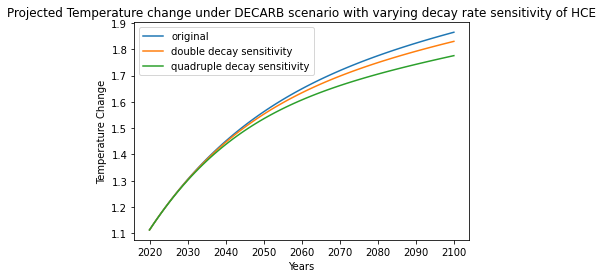

In [ ]:
plt.plot(df2['Years'],df2['temp change'],label='original')
plt.plot(df5['Years'],df5['temp change'],label='double decay sensitivity')
plt.plot(df7['Years'],df7['temp change'],label='quadruple decay sensitivity')
plt.xlabel('Years')
plt.ylabel('Temperature Change')
plt.title('Projected Temperature change under DECARB scenario with varying decay rate sensitivity of HCE')
plt.legend(loc='best')